### Importing packages

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Moudles related to feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [3]:
df = pd.read_csv("E:\datasets\loans_full_schema.csv")

In [4]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [5]:
df.rename(columns={'public_record_bankrupt':"default"},inplace = True)

In [6]:
df.default.value_counts()

default
0    8785
1    1195
2      17
3       3
Name: count, dtype: int64

In [7]:
df['default'] = df['default'].apply(lambda x: 0 if x == 0 else 1)

In [8]:
df.default.value_counts()

default
0    8785
1    1215
Name: count, dtype: int64

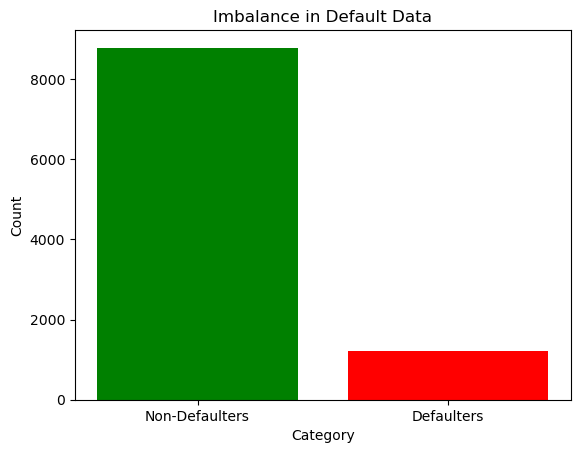

In [9]:
# Count the occurrences of each value in the 'default' column
default_counts = df['default'].value_counts()

# Bar chart
categories = ['Non-Defaulters', 'Defaulters']
values = [default_counts[0], default_counts[1]]
colors = ['green', 'red']

plt.bar(categories, values, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Imbalance in Default Data')
plt.show()

### Data inspection

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [11]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,default,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.121500,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.326724,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,1.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [12]:
df.nunique()

emp_title                           4741
emp_length                            11
state                                 50
homeownership                          3
annual_income                       1463
verified_income                        3
debt_to_income                      3673
annual_income_joint                  596
verification_income_joint              3
debt_to_income_joint                1189
delinq_2y                             12
months_since_last_delinq              97
earliest_credit_line                  53
inquiries_last_12m                    26
total_credit_lines                    78
open_credit_lines                     45
total_credit_limit                  9119
total_credit_utilized               9497
num_collections_last_12m               4
num_historical_failed_to_pay           9
months_since_90d_late                106
current_accounts_delinq                2
total_collection_amount_ever         896
current_installment_accounts          30
accounts_opened_

In [13]:
df.shape

(10000, 55)

In [14]:
df.isna().sum() / df.shape[0] * 100

emp_title                            8.33
emp_length                           8.17
state                                0.00
homeownership                        0.00
annual_income                        0.00
verified_income                      0.00
debt_to_income                       0.24
annual_income_joint                 85.05
verification_income_joint           85.45
debt_to_income_joint                85.05
delinq_2y                            0.00
months_since_last_delinq            56.58
earliest_credit_line                 0.00
inquiries_last_12m                   0.00
total_credit_lines                   0.00
open_credit_lines                    0.00
total_credit_limit                   0.00
total_credit_utilized                0.00
num_collections_last_12m             0.00
num_historical_failed_to_pay         0.00
months_since_90d_late               77.15
current_accounts_delinq              0.00
total_collection_amount_ever         0.00
current_installment_accounts      

In [15]:
### dropping collumns with more than 20% missing values
df.drop(columns= ['annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late'],inplace = True)

### UDF's

In [16]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.dtype, x.nunique(), x.isna().count(), x.count(), x.isna().sum(), 
                              x.isna().sum()/x.isna().count(), 
                          x.sum(), x.mean(), x.std(), x.var(), 
            x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.1), 
                      x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.90),
                      x.quantile(0.95), x.quantile(0.99), x.max()],
            index = ['dtype', 'unique', 'Total Records', 'n', 'nmiss', '% nmiss', 'sum', 
                     'mean', 'std', 'var', 'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 
                         'p90', 'p95', 'p99', 'max'])

In [17]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [18]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [19]:
df_int = df.select_dtypes(exclude ='object')
df_obj = df.select_dtypes(include ='object')

In [20]:
df_int.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,default,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,3.0,90000.0,18.01,0,2001,6,28,10,70795,38767,...,0,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0
1,10.0,40000.0,5.04,0,1996,1,30,14,28800,4321,...,1,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0
2,3.0,40000.0,21.15,0,2006,4,31,10,24193,16000,...,0,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0
3,1.0,30000.0,10.16,0,2007,0,4,4,25400,4997,...,0,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0
4,10.0,35000.0,57.96,0,2008,7,22,16,69839,52722,...,0,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0


In [21]:
df_obj.head()

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [22]:
df_int.apply(continuous_var_summary)

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,default,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
dtype,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
unique,11,1463,3673,12,53,26,78,45,9119,9497,...,2,612,2,58,3540,5741,7475,5765,7422,29
Total Records,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
n,9183,10000,9976,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
nmiss,817,0,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
% nmiss,0.0817,0.0,0.0024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,54458.0,792221484.12,192618.52,2160,20012900,19582,226796,114044,1836062304,510490631,...,1215,163619225,432720,124275.24,4762053.23,144589166.1,24942347.733002,18944484.66,5996667.81,1195.16
mean,5.930306,79222.148412,19.308192,0.216,2001.29,1.9582,22.6796,11.4044,183606.2304,51049.0631,...,0.1215,16361.9225,43.272,12.427524,476.205323,14458.91661,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,64734.290492,15.004851,0.68366,7.79551,2.38013,11.885439,5.86828,187632.707777,53636.731172,...,0.326724,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
var,13.717643,4190528365.472091,225.145563,0.467391,60.769977,5.665019,141.26367,34.436704,35206033027.658669,2876898930.842813,...,0.106748,106130313.072793,121.658182,25.01105,86937.482013,99292493.163191,15667587.625267,15088619.10077,267628.32363,3.288665


In [23]:
# Handling Outliers
df_int = df_int.apply(lambda x: x.clip(lower = x.quantile(0.01), 
                                                     upper = x.quantile(0.99)))

In [24]:
df_int.apply(continuous_var_summary)

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,default,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
dtype,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,...,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64
unique,11,1369,3524,4,38,12,56,29,8966,9327,...,2,604,2,51,3445,5697,7297,5669,7255,1
Total Records,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
n,9183,10000,9976,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
nmiss,817,0,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
% nmiss,0.0817,0.0,0.0024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,54458.0,776765331.12,187950.28,1992,20013282,19306,226170,113630,1808423276.0,500118336.0,...,1215,163647125,432720,124074.2,4759154.13,144544867.13,24188545.318266,18246047.23,5957525.22,0.0
mean,5.930306,77676.533112,18.840245,0.1992,2001.3282,1.9306,22.617,11.363,180842.3276,50011.8336,...,0.1215,16364.7125,43.272,12.40742,475.915413,14454.486713,2418.854532,1824.604723,595.752522,0.0
std,3.703734,49127.015726,10.754155,0.551498,7.649349,2.22865,11.622419,5.696637,171325.50624,46434.378253,...,0.326724,10297.869402,11.029877,4.936664,293.471461,9953.848102,3377.51812,3333.393961,499.790861,0.0
var,13.717643,2413463674.172763,115.651857,0.30415,58.512536,4.96688,135.080619,32.451676,29352429088.284752,2156151483.78112,...,0.106748,106046114.216253,121.658182,24.370655,86125.498459,99079092.035259,11407628.647659,11111515.29713,249790.905105,0.0


In [25]:
df_obj.apply(categorical_var_summary)

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
N,9167,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
NMISS,833,0,0,0,0,0,0,0,0,0,0,0
MODE,manager,CA,MORTGAGE,Source Verified,debt_consolidation,individual,B,B1,Mar-2018,Current,whole,Cash
FREQ,218,1330,4789,4116,5144,8505,3037,647,3617,9375,8206,9284
PERCENT,2.38,13.3,47.89,41.16,51.44,85.05,30.37,6.47,36.17,93.75,82.06,92.84


### Missing value treatment

In [26]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [27]:
df_int = df_int.apply(missing_imputation)

In [28]:
df_int.isna().sum() / df_int.shape[0] * 100

emp_length                          0.0
annual_income                       0.0
debt_to_income                      0.0
delinq_2y                           0.0
earliest_credit_line                0.0
inquiries_last_12m                  0.0
total_credit_lines                  0.0
open_credit_lines                   0.0
total_credit_limit                  0.0
total_credit_utilized               0.0
num_collections_last_12m            0.0
num_historical_failed_to_pay        0.0
current_accounts_delinq             0.0
total_collection_amount_ever        0.0
current_installment_accounts        0.0
accounts_opened_24m                 0.0
months_since_last_credit_inquiry    0.0
num_satisfactory_accounts           0.0
num_accounts_120d_past_due          0.0
num_accounts_30d_past_due           0.0
num_active_debit_accounts           0.0
total_debit_limit                   0.0
num_total_cc_accounts               0.0
num_open_cc_accounts                0.0
num_cc_carrying_balance             0.0


In [29]:
### filling missing value of job tittle with its MODE
df_obj.emp_title.fillna(value = 'manager',inplace= True )

In [30]:
df_obj.isna().sum() / df_obj.shape[0] * 100

emp_title                 0.0
state                     0.0
homeownership             0.0
verified_income           0.0
loan_purpose              0.0
application_type          0.0
grade                     0.0
sub_grade                 0.0
issue_month               0.0
loan_status               0.0
initial_listing_status    0.0
disbursement_method       0.0
dtype: float64

### EDA

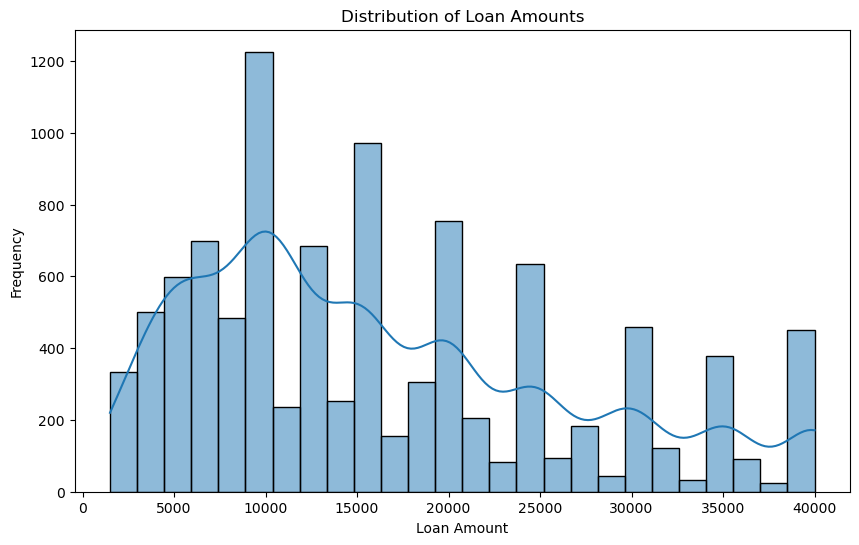

In [31]:
# Histogram of Loan Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_int['loan_amount'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


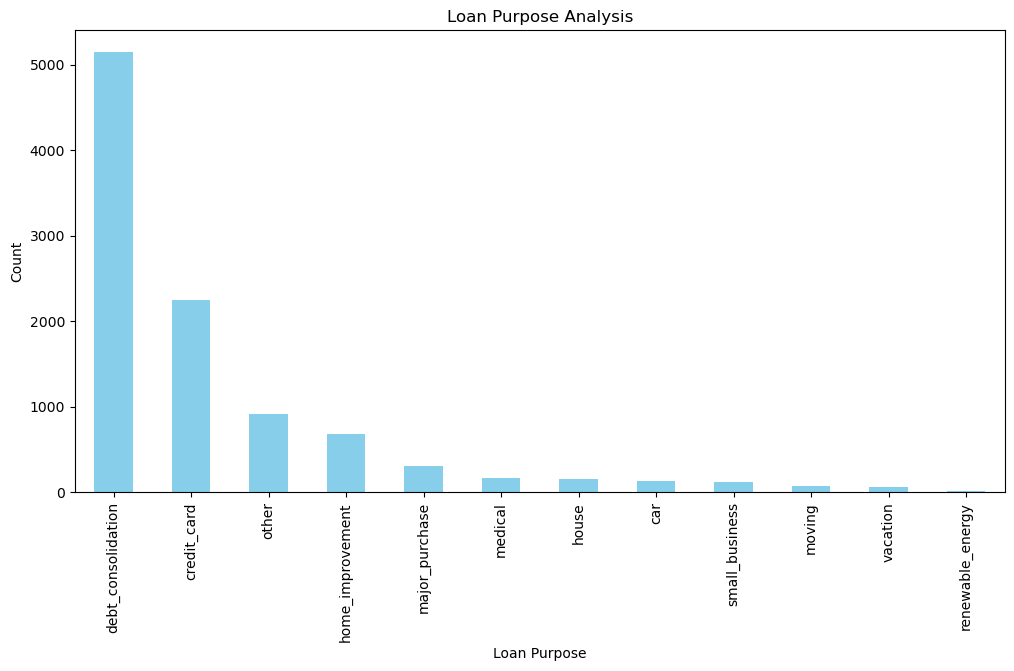

In [32]:
plt.figure(figsize=(12, 6))
df_obj['loan_purpose'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Loan Purpose Analysis')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.show()

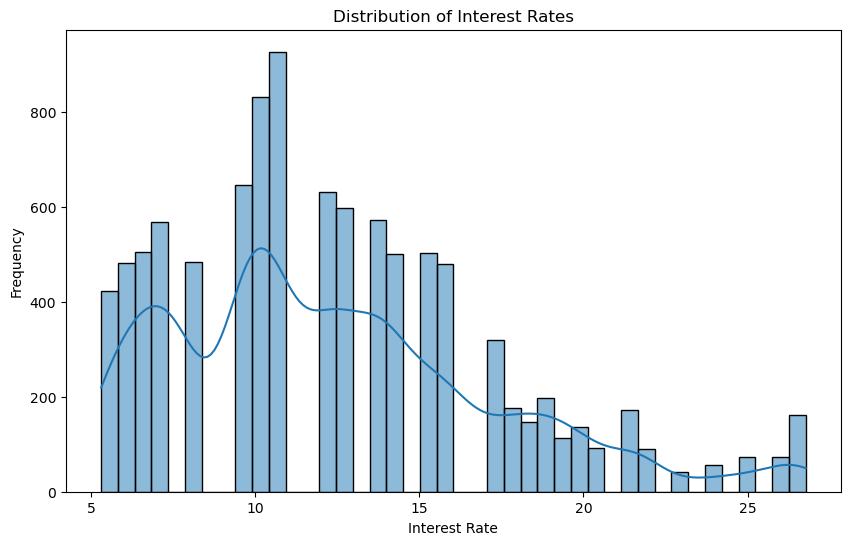

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df_int['interest_rate'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

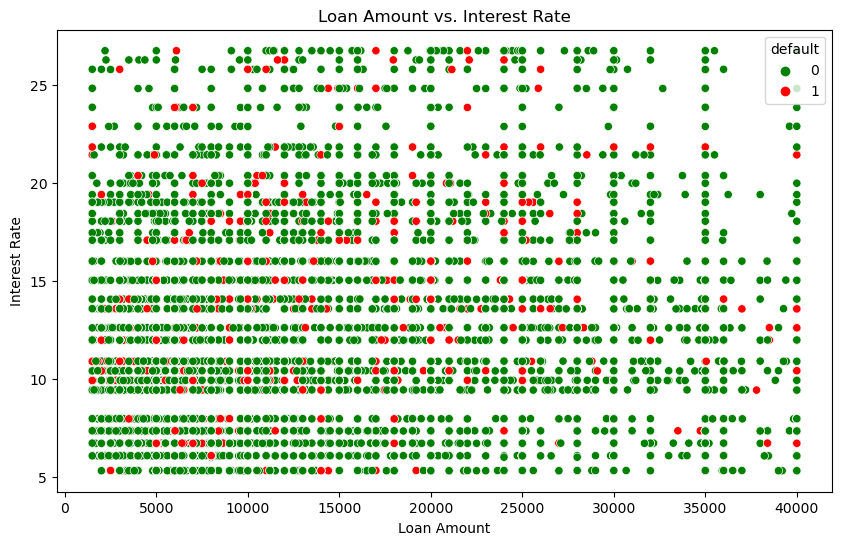

In [34]:
# Scatter Plot of Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_int, x='loan_amount', y='interest_rate', hue='default', palette=['green', 'red'])
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

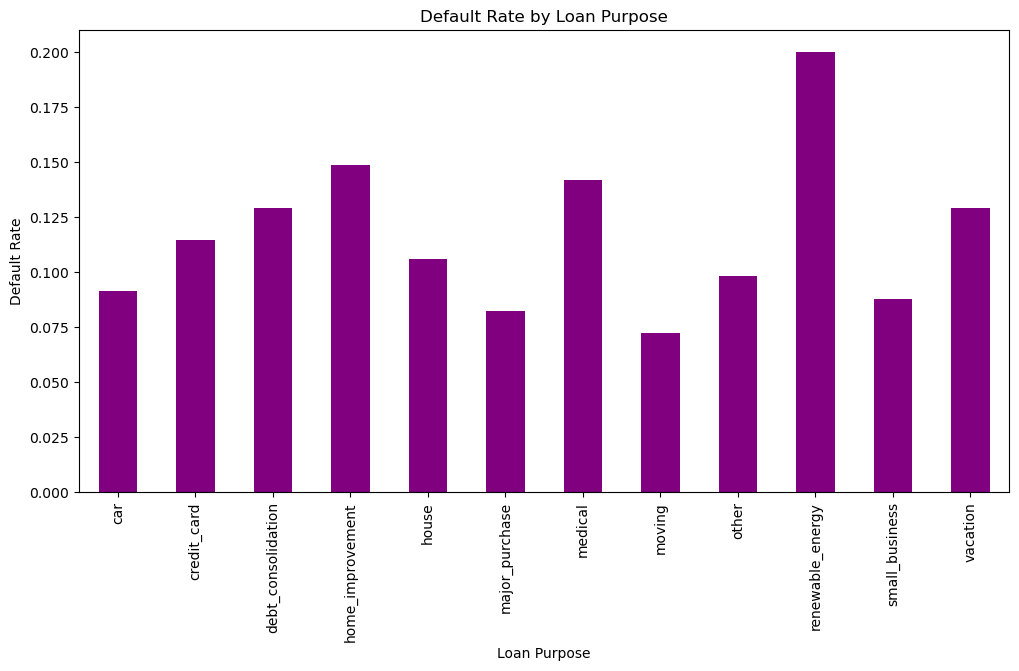

In [35]:
# Bar Chart of Default Rate by Loan Purpose
default_rate_by_purpose = df.groupby('loan_purpose')['default'].mean()
plt.figure(figsize=(12, 6))
default_rate_by_purpose.plot(kind='bar', color='purple')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.show()

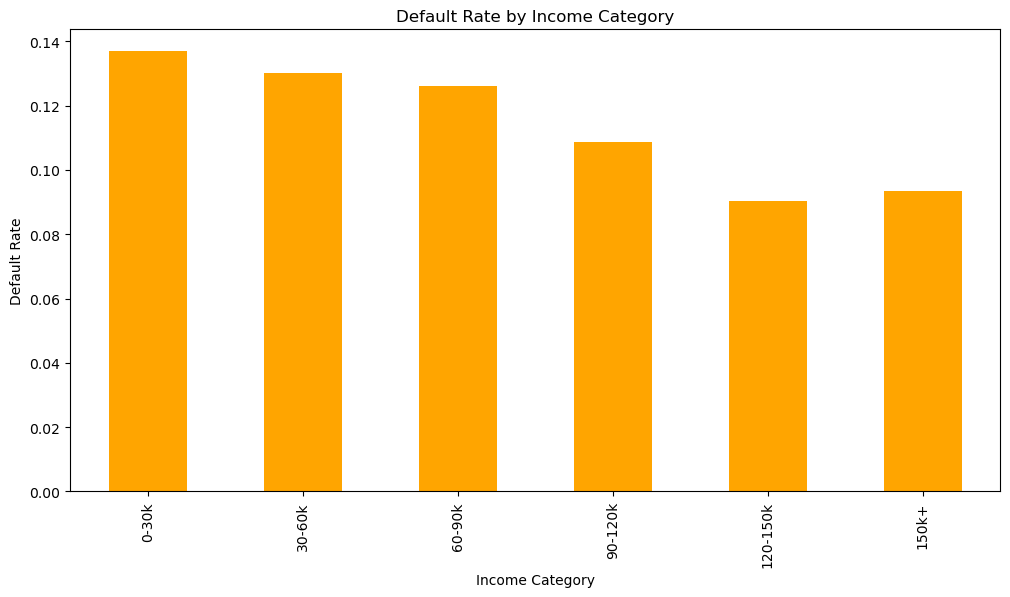

In [36]:
# Bar Chart of Default Rate by Income Category
df['income_category'] = pd.cut(df['annual_income'], bins=[0, 30000, 60000, 90000, 120000, 150000, float('inf')],
                               labels=['0-30k', '30-60k', '60-90k', '90-120k', '120-150k', '150k+'])
default_rate_by_income = df.groupby('income_category')['default'].mean()
plt.figure(figsize=(12, 6))
default_rate_by_income.plot(kind='bar', color='orange')
plt.title('Default Rate by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Default Rate')
plt.show()

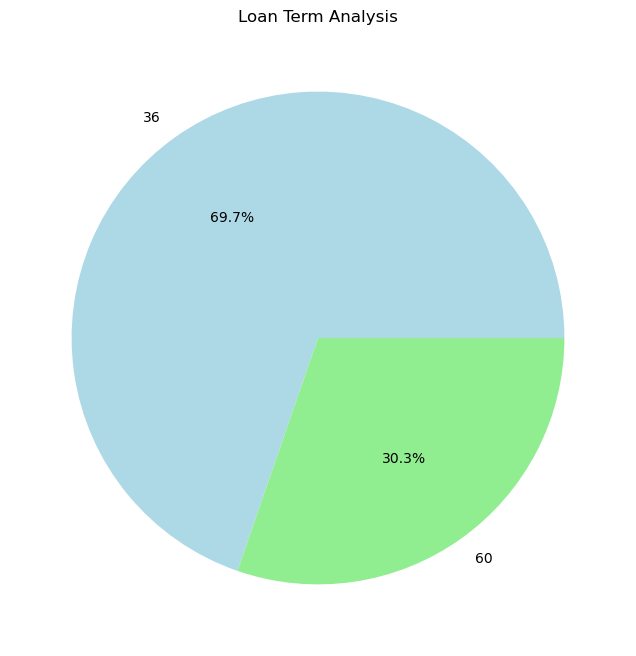

In [37]:
# Pie Chart of Loan Terms
plt.figure(figsize=(8, 8))
df_int['term'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Loan Term Analysis')
plt.ylabel('')
plt.show()

In [38]:
df_obj.nunique()

emp_title                 4741
state                       50
homeownership                3
verified_income              3
loan_purpose                12
application_type             2
grade                        7
sub_grade                   32
issue_month                  3
loan_status                  6
initial_listing_status       2
disbursement_method          2
dtype: int64

In [39]:
df_obj.head()

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [40]:
# Initialize the LabelEncoder
label_encoders = {col: LabelEncoder() for col in df_obj.columns}

In [41]:
# Apply LabelEncoder to each categorical column
for col, le in label_encoders.items():
    df_obj[col] = le.fit_transform(df_obj[col])

In [42]:
data_new = pd.concat([df_int, df_obj], axis=1)

In [43]:
data_new.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,3.0,90000.0,18.01,0,2001,6,28,10,70795.0,38767.0,...,0,2,7,0,2,12,2,1,1,0
1,10.0,40000.0,5.04,0,1996,1,30,14,28800.0,4321.0,...,2,0,2,0,2,10,0,1,1,0
2,3.0,40000.0,21.15,0,2006,4,31,10,24193.0,16000.0,...,2,1,8,0,3,15,0,1,0,0
3,1.0,30000.0,10.16,0,2007,0,4,4,25400.0,4997.0,...,2,0,2,0,0,2,1,1,1,0
4,10.0,35000.0,57.96,0,2008,7,22,16,69839.0,52722.0,...,2,2,1,1,2,12,2,1,1,0


In [44]:
data_new.shape

(10000, 50)

In [45]:
len(data_new.columns)

50

In [46]:
data_new.columns

Index(['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_120d_past_due', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'default', 'loan_amount',
       'term', 'interest_rate', 'installment', 'balance', 'paid_total',
       'paid_principal', 'paid_interest', 'paid_late_fees', 'emp_title',
       'state', 'homeownership', 'verified_income', 'loan

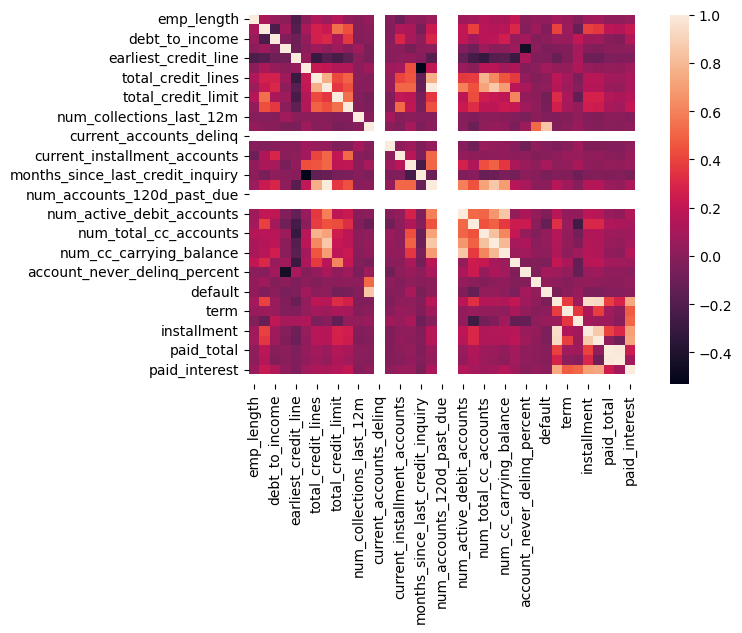

In [47]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(df_int.corr())
plt.show()

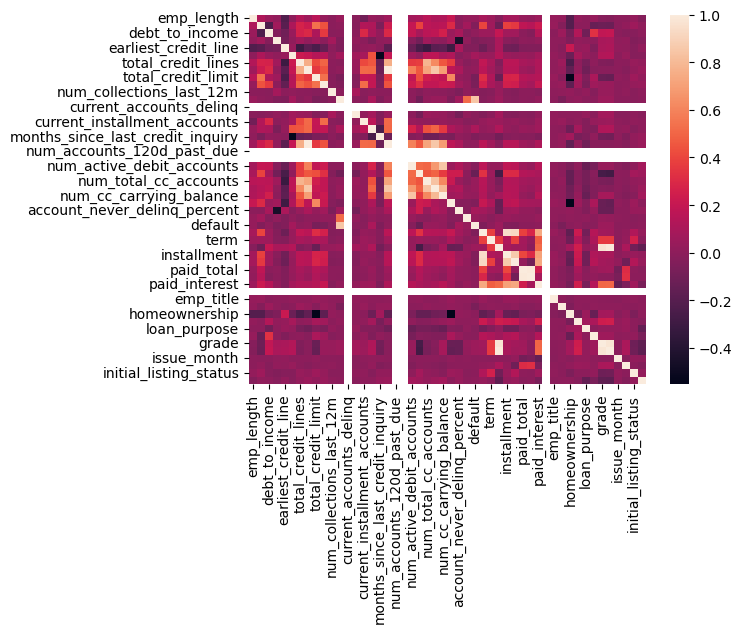

In [48]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_new.corr())
plt.show()

### Feature Selcetion

In [49]:
y_var = 'default'
x_var = data_new.columns.difference(['default'])

In [50]:
#RFE
Logreg = RandomForestRegressor()
rfe = RFE(estimator = Logreg,n_features_to_select = 20)
rfe = rfe.fit(data_new[x_var],data_new[y_var])

print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True False False  True False False  True False
  True False False False False False  True False False False False  True
 False False  True False False  True False False False  True False  True
 False  True  True  True False  True False False  True  True  True  True
 False]
[ 1  4  1 21  1 25 11  1 22 23  1  3  1 17 19 20 14  6  1 13  7  9 24  1
 30 26  1  2 29  1 15 10  5  1 12  1 28  1  1  1  8  1 27 16  1  1  1  1
 18]


In [51]:
X_final = data_new[x_var[rfe.support_]]
y_final = data_new['default']

In [52]:
X_final.head()

,account_never_delinq_percent,annual_income,balance,debt_to_income,earliest_credit_line,emp_title,interest_rate,months_since_last_credit_inquiry,num_active_debit_accounts,num_historical_failed_to_pay,num_total_cc_accounts,paid_interest,paid_principal,paid_total,state,tax_liens,total_credit_limit,total_credit_lines,total_credit_utilized,total_debit_limit
0,92.9,90000.0,27015.86,18.01,2001,1777,14.07,5.0,2,0,14.0,1015.19,984.14,1999.33,30,0,70795.0,28,38767.0,11100
1,100.0,40000.0,4651.37,5.04,1996,4675,12.61,8.0,3,1,24.0,150.49,348.63,499.12,11,0,28800.0,30,4321.0,16500
2,93.5,40000.0,1824.63,21.15,2006,207,17.09,7.0,3,0,14.0,106.43,175.37,281.80,47,0,24193.0,31,16000.0,4300
3,100.0,30000.0,18853.26,10.16,2007,1035,6.72,15.0,2,1,3.0,566.15,2746.74,3312.89,37,1,25400.0,4,4997.0,19400
4,100.0,35000.0,21430.15,57.96,2008,3710,14.07,4.0,10,0,20.0,754.80,1569.85,2324.65,4,0,69839.0,22,52722.0,32700


In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(X_final,y_final)

In [55]:
# Display the shape of the resampled data
print(f"Original dataset shape: {y_final.shape}")
print(f"Resampled dataset shape: {Y_res.shape}")

Original dataset shape: (10000,)
Resampled dataset shape: (17570,)


In [56]:
Y_res.value_counts()

default
0    8785
1    8785
Name: count, dtype: int64

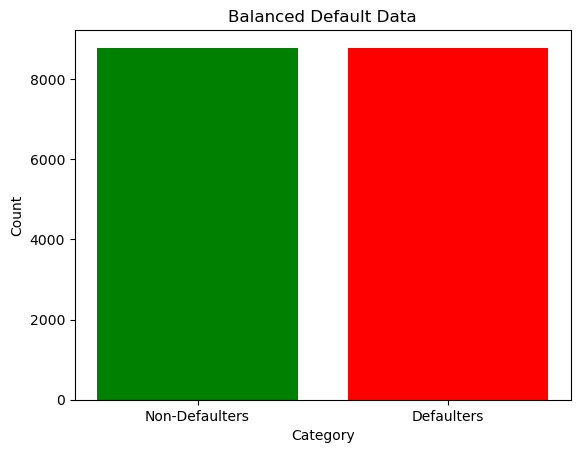

In [57]:
# Count the occurrences of each value in the 'default' column
default_counts = Y_res.value_counts()

# Bar chart
categories = ['Non-Defaulters', 'Defaulters']
values = [default_counts[0], default_counts[1]]
colors = ['green', 'red']

plt.bar(categories, values, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Balanced Default Data')
plt.show()

In [58]:
final_df = pd.concat([X_res, Y_res], axis=1)

In [59]:
final_df.head()

,account_never_delinq_percent,annual_income,balance,debt_to_income,earliest_credit_line,emp_title,interest_rate,months_since_last_credit_inquiry,num_active_debit_accounts,num_historical_failed_to_pay,...,paid_interest,paid_principal,paid_total,state,tax_liens,total_credit_limit,total_credit_lines,total_credit_utilized,total_debit_limit,default
0,92.9,90000.0,27015.86,18.01,2001,1777,14.07,5.0,2,0,...,1015.19,984.14,1999.33,30,0,70795.0,28,38767.0,11100,0
1,100.0,40000.0,4651.37,5.04,1996,4675,12.61,8.0,3,1,...,150.49,348.63,499.12,11,0,28800.0,30,4321.0,16500,1
2,93.5,40000.0,1824.63,21.15,2006,207,17.09,7.0,3,0,...,106.43,175.37,281.80,47,0,24193.0,31,16000.0,4300,0
3,100.0,30000.0,18853.26,10.16,2007,1035,6.72,15.0,2,1,...,566.15,2746.74,3312.89,37,1,25400.0,4,4997.0,19400,0
4,100.0,35000.0,21430.15,57.96,2008,3710,14.07,4.0,10,0,...,754.80,1569.85,2324.65,4,0,69839.0,22,52722.0,32700,0


### Splitting the data into train & test 

In [60]:
target = final_df[['default']]
features = X_res

In [61]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

###  Decision Trees

##### Important Tuning Parameters for DT: 
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.

#### Fine Tuning the parameters

In [62]:
param_grid = {'max_depth': np.arange(2,10),
             'max_features': np.arange(2,10)}

In [63]:
tree = GridSearchCV( estimator = DecisionTreeClassifier( random_state = 20 ),
                param_grid = param_grid, cv = 10, 
                    scoring = 'roc_auc', 
                        n_jobs = -1,
                            verbose = True)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=20),
             n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc', verbose=True)

In [64]:
tree.best_score_

0.9999721040687239

In [65]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=9, random_state=20)

In [66]:
tree.best_params_

{'max_depth': 3, 'max_features': 9}

In [67]:
pred_train = tree.predict(train_X)

In [68]:
print(metrics.classification_report(train_y,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6161
           1       1.00      1.00      1.00      6138

    accuracy                           1.00     12299
   macro avg       1.00      1.00      1.00     12299
weighted avg       1.00      1.00      1.00     12299



In [69]:
pred_test = tree.predict(test_X)

In [70]:
print(metrics.classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2624
           1       1.00      0.99      1.00      2647

    accuracy                           1.00      5271
   macro avg       1.00      1.00      1.00      5271
weighted avg       1.00      1.00      1.00      5271



### Building final decision tree model with best parameters

In [71]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=8, max_leaf_nodes=5,random_state=20 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=8, max_leaf_nodes=5,
                       random_state=20)

In [72]:
train_pred = clf_tree.predict(train_X)
test_pred = clf_tree.predict(test_X)

### Train dataset

In [73]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6161
           1       1.00      0.99      1.00      6138

    accuracy                           1.00     12299
   macro avg       1.00      1.00      1.00     12299
weighted avg       1.00      1.00      1.00     12299



In [121]:
train_auc_tree = metrics.roc_auc_score(train_y,train_pred)
train_auc_tree

0.9971489084392311

In [122]:
train_acc_tree = metrics.accuracy_score(train_y,train_pred)
train_acc_tree

0.9971542401821286

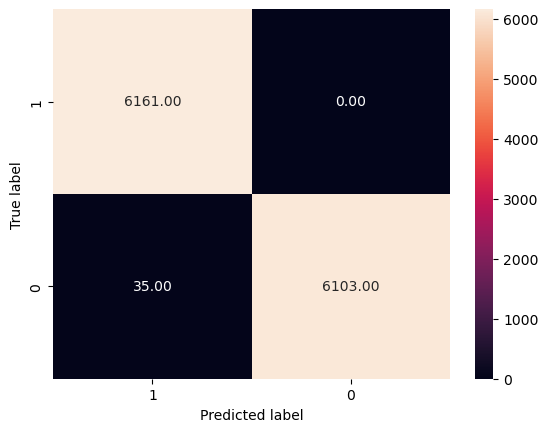

In [76]:
# confusion metrix for train data
test_cm = metrics.confusion_matrix(train_y, train_pred)
sns.heatmap(test_cm, annot = True, fmt = '.2f',
                xticklabels = ["1", "0"] , 
                    yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Testing dataset

In [77]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2624
           1       1.00      0.99      1.00      2647

    accuracy                           1.00      5271
   macro avg       1.00      1.00      1.00      5271
weighted avg       1.00      1.00      1.00      5271



In [124]:
test_auc_tree = metrics.roc_auc_score(test_y,test_pred)
test_auc_tree

0.9971666037023045

In [125]:
test_acc_tree = metrics.accuracy_score(test_y,test_pred)
test_acc_tree

0.9971542401821286

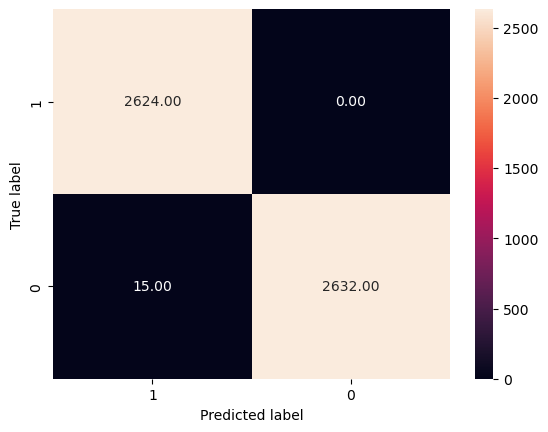

In [80]:
# confusion metrix for test data
test_cm = metrics.confusion_matrix(test_y, test_pred)
sns.heatmap(test_cm, annot = True, fmt = '.2f',
                xticklabels = ["1", "0"] , 
                    yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### BUILDING RANDOM FOREST MODEL

In [81]:
pargrid_rf = { 'n_estimators': [50, 75, 90, 100, 120, 150],
                  'max_features': [6, 7, 8, 9] }

gscv_rf = GridSearchCV(estimator = RandomForestClassifier( random_state = 1 ), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = 10, 
                        scoring = 'roc_auc',
                        n_jobs = -1).fit(train_X, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\mehta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [82]:
gscv_rf.best_params_

{'max_features': 7, 'n_estimators': 75}

In [83]:
gscv_rf.best_score_

0.9999845308094486

### Final Random Forest model with best parameters

In [87]:
radm_clf = RandomForestClassifier(n_estimators=75,
                                  max_features=7,
                                  n_jobs=-1).fit(train_X,train_y)

C:\Users\mehta\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [92]:
train_pred_rf = radm_clf.predict(train_X)
test_pred_rf = radm_clf.predict(test_X)

In [127]:
print("Model Performance")
print("Train Dataset")
train_Acc_rf = metrics.accuracy_score(train_y, train_pred_rf).round(2)
print("Accuracy : ", train_Acc_rf)
print(metrics.classification_report(train_y, train_pred_rf))
train_auc_rf = metrics.roc_auc_score(train_y, train_pred_rf).round(3)
print("ROC-AUC Score: ",train_auc_rf)

Model Performance
Train Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6161
           1       1.00      1.00      1.00      6138

    accuracy                           1.00     12299
   macro avg       1.00      1.00      1.00     12299
weighted avg       1.00      1.00      1.00     12299

ROC-AUC Score:  1.0


In [128]:
print("Model Performance")
print("Test Dataset")
test_Acc_rf = metrics.accuracy_score(test_y, test_pred_rf).round(2)
print("Accuracy : ", test_Acc_rf)
print(metrics.classification_report(test_y, test_pred_rf))
test_auc_rf = metrics.roc_auc_score(test_y, test_pred_rf).round(3)
print("ROC-AUC Score: ",test_auc_rf)

Model Performance
Test Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2624
           1       1.00      1.00      1.00      2647

    accuracy                           1.00      5271
   macro avg       1.00      1.00      1.00      5271
weighted avg       1.00      1.00      1.00      5271

ROC-AUC Score:  0.997


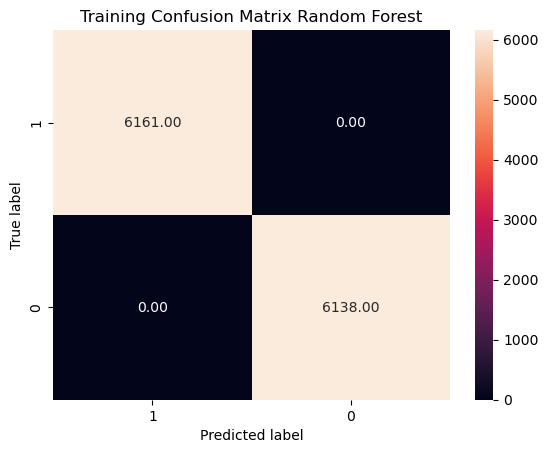

In [101]:
# confusion metrix for training data
confusion_matrix = metrics.confusion_matrix(train_y, train_pred_rf)
sns.heatmap(confusion_matrix, annot = True, fmt = '.2f',
                xticklabels = ["1", "0"] , 
                    yticklabels = ["1", "0"])

plt.title('Training Confusion Matrix Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

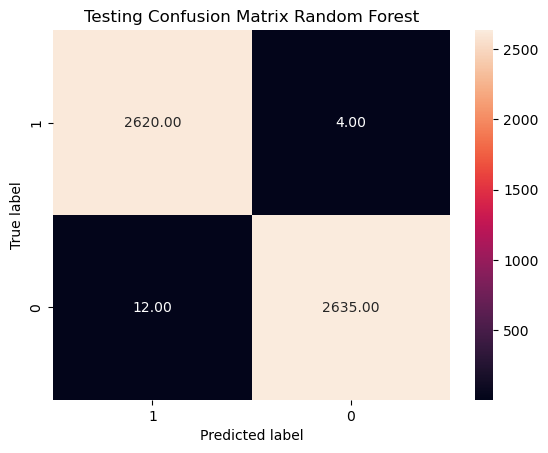

In [102]:
# confusion metrix for test data
confusion_metrix = metrics.confusion_matrix(test_y, test_pred_rf)
sns.heatmap(confusion_metrix, annot = True, fmt = '.2f',
                xticklabels = ["1", "0"] , 
                    yticklabels = ["1", "0"])

plt.title('Testing Confusion Matrix Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Feature importance from the Random Forest Model

In [88]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

<Axes: xlabel='importance', ylabel='feature'>

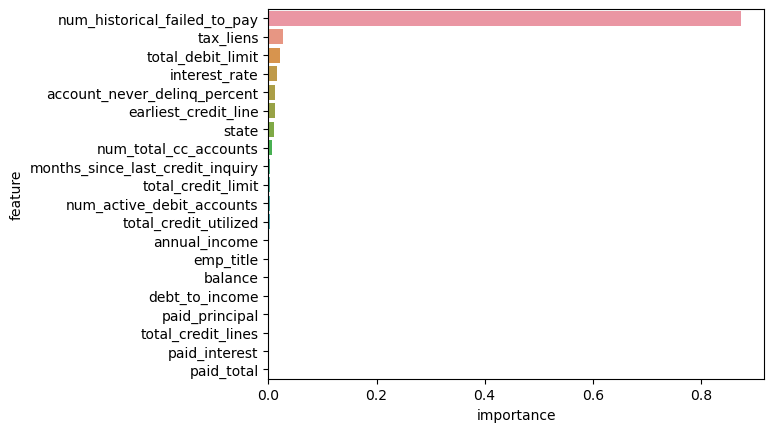

In [90]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

### Selecting Top 10 Features

In [103]:
top_10 = list(feature_rank['feature'].head(10))

In [105]:
X_final.shape

(10000, 20)

In [107]:
X = X_final[top_10]
X_train, X_test, y_train, y_test = train_test_split(X,y_final, test_size=0.3, random_state=123)

In [108]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7000, 10) (7000,)
(3000, 10) (3000,)


### Adda Boost

In [109]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [111]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)
gscv_ada.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [113]:
print(gscv_ada.best_params_)
print(gscv_ada.best_estimator_)
print(gscv_ada.best_score_)

{'learning_rate': 1, 'n_estimators': 600}
AdaBoostClassifier(learning_rate=1, n_estimators=600)
0.9971428571428571


In [114]:
ad=AdaBoostClassifier(learning_rate = 1, n_estimators=600)
ad.fit(X_train, y_train )

AdaBoostClassifier(learning_rate=1, n_estimators=600)

In [115]:
test_pred_ad = ad.predict(X_test)
train_pred_ad = ad.predict(X_train)

In [129]:
print("Model Performance")
print("Train Dataset")
train_acc_ad = metrics.accuracy_score(y_train, train_pred_ad).round(2)
print("Accuracy : ", train_acc_ad)
print(metrics.classification_report(y_train, train_pred_ad))
lr_train = metrics.accuracy_score(y_train, train_pred_ad)
train_auc_ad = metrics.roc_auc_score(y_train, train_pred_ad).round(3)
print("ROC-AUC Score: ",train_auc_ad)

Model Performance
Train Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00       862

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

ROC-AUC Score:  1.0


In [130]:
print("Model Performance")
print("Test Dataset")
test_acc_ad = metrics.accuracy_score(y_test, test_pred_ad).round(2)
print("Accuracy : ", test_acc_ad)
print(metrics.classification_report(y_test, test_pred_ad))
lr_test = metrics.accuracy_score(y_test, test_pred_ad)
test_auc_ad = metrics.roc_auc_score(y_test, test_pred_ad).round(3)
print("ROC-AUC Score: ",test_auc_ad)

Model Performance
Test Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2647
           1       0.97      0.99      0.98       353

    accuracy                           1.00      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC Score:  0.993


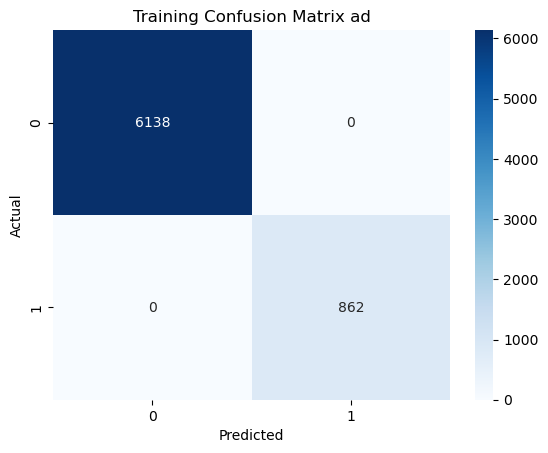

In [118]:
plt.title('Training Confusion Matrix ad')
confusion_matrix = pd.crosstab(y_train, train_pred_ad, rownames=['Actual'], colnames=['Predicted']).round(1)
sns.heatmap(confusion_matrix, annot=True,fmt='g',cmap = 'Blues')
plt.show()

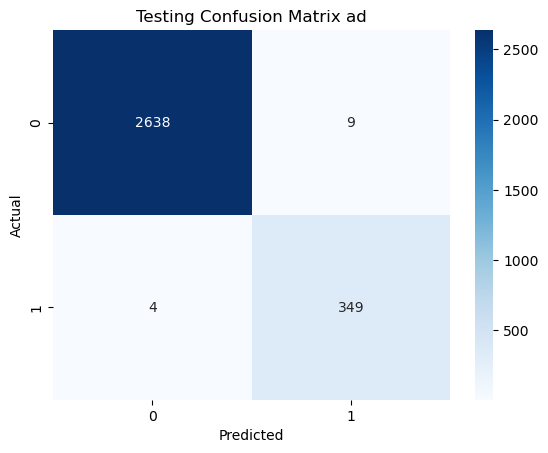

In [119]:
plt.title('Testing Confusion Matrix ad')
confusion_metrix = pd.crosstab(y_test, test_pred_ad, rownames=['Actual'], colnames=['Predicted']).round(1)
sns.heatmap(confusion_metrix, annot=True,fmt='g',cmap = 'Blues')
plt.show()

### K-Nearest Neighbors

##### Important Tuning Parameters for KNN: 
- n_neighbors - The number of nearest neighbors K in the K-NN algorithm
- weights - weight function used in predictions.

In [144]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_data = sc.fit_transform(X_train)

In [151]:
std_data_train = pd.DataFrame(std_data, columns=X_train.columns, index = X_train.index )
std_data_train.shape

(7000, 10)

In [153]:
std_data_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index = X_test.index)
std_data_test.shape

(3000, 10)

In [158]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[7,8,9,10,11,12,13,14,15,16,17],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, y_train)

In [161]:
model.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

In [162]:
model.best_score_

0.9959844865064882

### Final knn with best parameters

In [163]:
knn = KNeighborsClassifier(n_neighbors=12,weights='uniform')
knn.fit(std_data_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [164]:
train_pred_knn = knn.predict(std_data_train)
test_pred_knn = knn.predict(std_data_test)

In [165]:
print("Model Performance")
print("Train Dataset")
train_acc_knn = metrics.accuracy_score(y_train, train_pred_knn).round(2)
print("Accuracy : ", train_acc_knn)
print(metrics.classification_report(y_train, train_pred_knn))
train_auc_knn = metrics.roc_auc_score(y_train, train_pred_knn).round(3)
print("ROC-AUC Score: ",train_auc_knn)

Model Performance
Train Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       0.99      0.98      0.98       862

    accuracy                           1.00      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       1.00      1.00      1.00      7000

ROC-AUC Score:  0.99


In [166]:
print("Model Performance")
print("Test Dataset")
test_acc_knn = metrics.accuracy_score(y_test, test_pred_knn).round(2)
print("Accuracy : ", test_acc_knn)
print(metrics.classification_report(y_test, test_pred_knn))
test_auc_knn = metrics.roc_auc_score(y_test, test_pred_knn).round(3)
print("ROC-AUC Score: ",test_auc_knn)

Model Performance
Test Dataset
Accuracy :  0.99
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2647
           1       0.95      0.99      0.97       353

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

ROC-AUC Score:  0.99


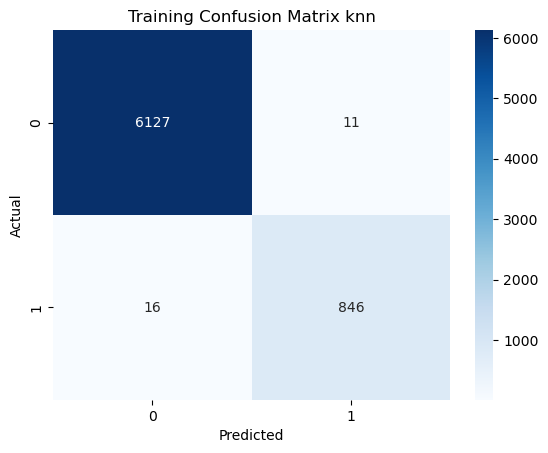

In [167]:
plt.title('Training Confusion Matrix knn')
confusion_matrix = pd.crosstab(y_train, train_pred_knn, rownames=['Actual'], colnames=['Predicted']).round(1)
sns.heatmap(confusion_matrix, annot=True,fmt='g',cmap = 'Blues')
plt.show()

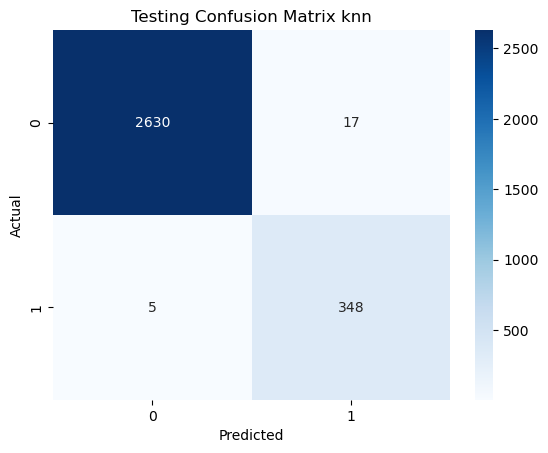

In [168]:
plt.title('Testing Confusion Matrix knn')
confusion_matrix = pd.crosstab(y_test, test_pred_knn, rownames=['Actual'], colnames=['Predicted']).round(1)
sns.heatmap(confusion_matrix, annot=True,fmt='g',cmap = 'Blues')
plt.show()

## Artificial Neural Networks (ANN) using Keras

In [176]:
pip install tf_keras 

  Obtaining dependency information for tf_keras from https://files.pythonhosted.org/packages/21/8b/75f7572ec0273ed8da50bc19defe08aaaafcc15fda3407db53f49acec814/tf_keras-2.17.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow<2.18,>=2.17 from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792

In [194]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [195]:
#Initializing Neural Network
classifier = Sequential()

In [196]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 30,activation = 'relu', input_dim = 10))
# Adding the second hidden layer
classifier.add(Dense(units = 30, activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

C:\Users\mehta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [197]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [198]:
# Fitting our model 
classifier.fit(std_data_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9329 - loss: 0.2213
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9942 - loss: 0.0144
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9960 - loss: 0.0108
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9973 - loss: 0.0062
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9963 - loss: 0.0072
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9967 - loss: 0.0068
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9959 - loss: 0.0081
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9976 - loss: 0.0056
Epoch 9/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9981 - loss: 0.0056
Epoch 10/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9972 - loss: 0.0054
Epoch 11/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9975 - loss: 0.0059
Epoch 12/100
700/700 ━━━━━━━━━━━━━━━━━━━━

In [199]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,875 (15.14 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,584 (10.10 KB)

In [200]:
classifier.get_weights()

[array([[-0.49741524,  0.301913  ,  0.6207136 , -0.8681192 , -0.23759335,
         -0.43197212, -0.26676616,  0.12998314,  0.6170864 ,  0.14710228,
         -0.93902797, -0.06138599,  0.26084945,  1.1604263 , -0.65859586,
          0.23073874, -0.83561313, -0.26178852,  0.16433221,  0.27781555,
         -0.04527206,  0.33255437, -0.15995449,  0.47382885, -0.23457973,
          0.30367547,  0.08927751,  0.287305  , -0.52409154,  0.11252953],
        [ 0.06634563, -0.5299936 , -0.23777507, -0.9820353 ,  0.0490643 ,
          0.3931497 ,  0.1893476 , -0.3442325 , -0.2917865 , -0.21063736,
         -0.5897537 , -0.12457652, -0.02970855, -1.29193   , -0.57414436,
         -0.144876  , -0.64503455,  0.28043556, -0.11098755, -0.4860726 ,
          0.3369419 , -0.31032982,  0.11950651, -0.26711595,  0.07227001,
          0.00980113, -0.3000247 ,  0.00214817, -0.6346862 , -0.12779263],
        [-0.4652745 ,  0.5705606 , -0.08650714, -0.4851906 , -0.0755323 ,
          0.07455301,  0.40599397, -

In [261]:
train_pred_ann = classifier.predict(std_data_train)
test_pred_ann = classifier.predict(std_data_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [262]:
print("Model Performance")
print("Train Dataset")
train_acc_ann = metrics.accuracy_score(y_train,np.round(abs(train_pred_ann)))
print("Accuracy : ", train_acc_ann)
print(metrics.classification_report(y_train, np.round(abs(train_pred_ann))))
train_auc_ann = metrics.roc_auc_score(y_train, np.round(abs(train_pred_ann)))
print("ROC-AUC Score: ",train_auc_ann)

Model Performance
Train Dataset
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6138
           1       1.00      1.00      1.00       862

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

ROC-AUC Score:  1.0


In [263]:
print("Model Performance")
print("Test Dataset")
test_acc_ann = metrics.accuracy_score(y_test,np.round(abs(test_pred_ann)))
print("Accuracy : ", test_acc_ann)
print(metrics.classification_report(y_test, np.round(abs(test_pred_ann))))
test_auc_ann = metrics.roc_auc_score(y_test, np.round(abs(test_pred_ann)))
print("ROC-AUC Score: ",test_auc_ann)

Model Performance
Test Dataset
Accuracy :  0.9943333333333333
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2647
           1       0.96      1.00      0.98       353

    accuracy                           0.99      3000
   macro avg       0.98      1.00      0.99      3000
weighted avg       0.99      0.99      0.99      3000

ROC-AUC Score:  0.9955612800208905


In [264]:
training_Acc = {'Classifiers':['Decision Tree','Random Forest','Adda Boost','KNN','ANN'],
                       'Accuracy': [train_acc_tree,train_Acc_rf,train_acc_ad,train_acc_knn,train_acc_ann]}

testing_Acc = {'Classifiers':['Decision Tree','Random Forest','Adda Boost','KNN','ANN'],
                       'Accuracy': [test_acc_tree,test_Acc_rf,test_acc_ad,test_acc_knn,test_acc_ann]}

auc = {'Classifiers':['Decision Tree','Random Forest','Adda Boost','KNN','ANN'],
                       'AUC': [test_auc_tree,test_auc_rf,test_auc_ad,test_auc_knn,test_auc_ann]}

In [265]:
training_Acc = pd.DataFrame(training_Acc)
testing_Acc = pd.DataFrame(testing_Acc)
auc = pd.DataFrame(auc)

### Training Accuracies

In [277]:
training_Acc
import plotly.express as px
fig = px.bar(training_Acc, x='Classifiers', y='Accuracy',color = 'Accuracy')
fig.show()

### Testing Accuracies

In [276]:
testing_Acc
import plotly.express as px
fig = px.bar(testing_Acc, x='Classifiers', y='Accuracy',color='Accuracy')
fig.show()

### AUC Scores

In [275]:
auc
import plotly.express as px
fig = px.bar(auc, x='Classifiers', y='AUC',color='AUC')
fig.show()